<IPython.core.display.Javascript object>


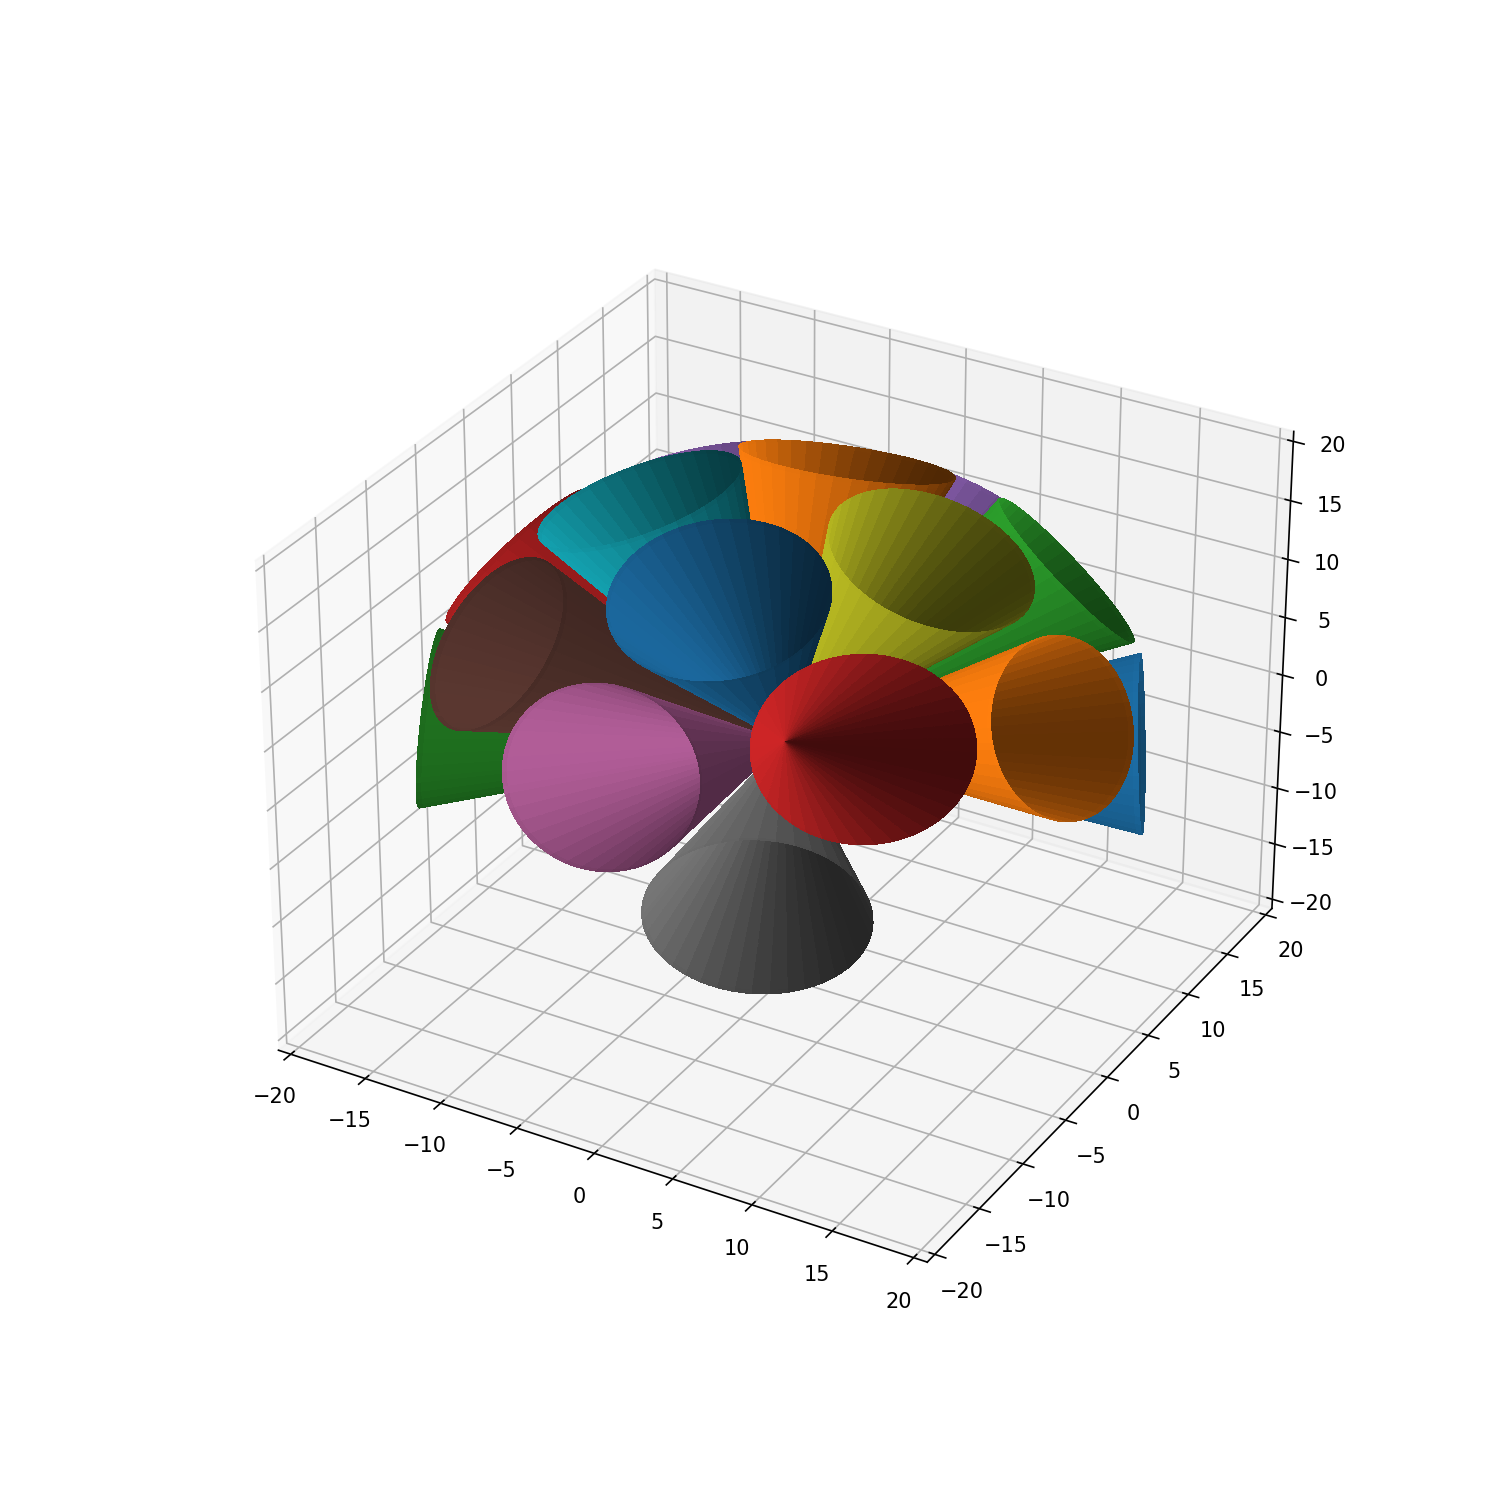

In [11]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import norm
import pylab as plt

%matplotlib notebook

DIFFUSE_CONE_DIRECTIONS = [    
    np.array([0.898904, 0.435512, 0.0479745]),
    np.array([0.898904, -0.0479745, 0.435512]),
    np.array([-0.898904, -0.435512, 0.0479745]),
    np.array([-0.898904, 0.0479745, 0.435512]),
    np.array([0.0479745, 0.898904, 0.435512]),
    np.array([-0.435512, 0.898904, 0.0479745]),
    np.array([-0.0479745, -0.898904, 0.435512]),
    np.array([0.435512, -0.898904, 0.0479745]),
    np.array([0.435512, 0.0479745, 0.898904]),
    np.array([-0.435512, -0.0479745, 0.898904]),
    np.array([0.0479745, -0.435512, 0.898904]),
    np.array([-0.0479745, 0.435512, 0.898904]),
    np.array([0.57735, 0.57735, 0.57735]),
    np.array([0.57735, -0.57735, 0.57735]),
    np.array([-0.57735, 0.57735, 0.57735]),
    np.array([-0.57735, -0.57735, 0.57735]),
]

DIFFUSE_CONE_APERTURE = 0.628319;

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection='3d')

def coordinate_system(n:np.array) :
    if(abs(n[0]) > abs(n[1])):
        ss = np.array([-n[2], 0, n[0]]) / sqrt(n[0] * n[0] + n[2] * n[2])
    else:
        ss = np.array([0, n[2], -n[1]]) / sqrt(n[1] * n[1] + n[2] * n[2])
    
    bs = np.cross(n, ss)
    return bs, ss


def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)


def truncated_cone(v, mag, R0, R1, color):
    # make some vector not in the same direction as v
    not_v = np.array([1, 1, 0])
    if (v == not_v).all():
        not_v = np.array([0, 1, 0])
    # make vector perpendicular to v
    n1 = np.cross(v, not_v)
    # print n1,'\t',norm(n1)
    # normalize n1
    n1 /= norm(n1)
    # make unit vector perpendicular to v and n1
    n2 = np.cross(v, n1)
    # surface ranges over t from 0 to length of axis and 0 to 2*pi
    n = 80
    t = np.linspace(0, mag, n)
    theta = np.linspace(0, 2 * np.pi, n)
    # use meshgrid to make 2d arrays
    t, theta = np.meshgrid(t, theta)
    R = np.linspace(R0, R1, n)
    # generate coordinates for surface
    X, Y, Z = [v[i] * t + R *
               np.sin(theta) * n1[i] + R * np.cos(theta) * n2[i] for i in [0, 1, 2]]
    ax.plot_surface(X, Y, Z, facecolor=color, linewidth=0, antialiased=False)


ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
ax.set_zlim(-20, 20)
cmap = get_cmap(30)

normal = np.array([0,0,1])

for index, dir in enumerate(DIFFUSE_CONE_DIRECTIONS):
    truncated_cone(dir, 20, 0, 20 * np.sin(DIFFUSE_CONE_APERTURE / 2.0), cmap(index))
plt.show()
